# Лабораторная работа №15. Проект.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imutils
import random
from collections import Counter
from sklearn.cluster import KMeans

## Удалении фона на изображении

In [28]:
def remove_background(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    result = cv2.bitwise_and(image, mask)
    return result

In [32]:
image = cv2.imread('img/mult2.jpeg')

In [33]:
result = remove_background(image)

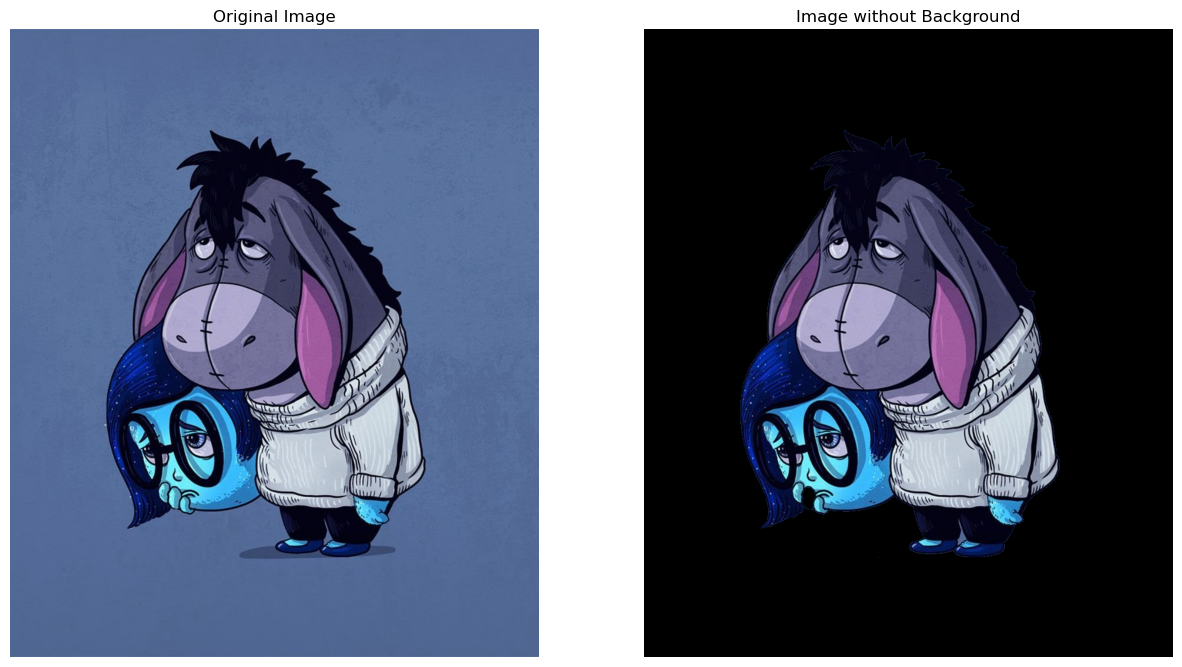

In [34]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image without Background')

plt.show()

## Морфологические операции

In [50]:
image = cv2.imread('img/smesh.jpeg', 0)

In [57]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

In [58]:
dilated_image = cv2.dilate(image, kernel)
eroded_image = cv2.erode(image, kernel)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
tophat_image = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
blackhat_image = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
gradient_image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

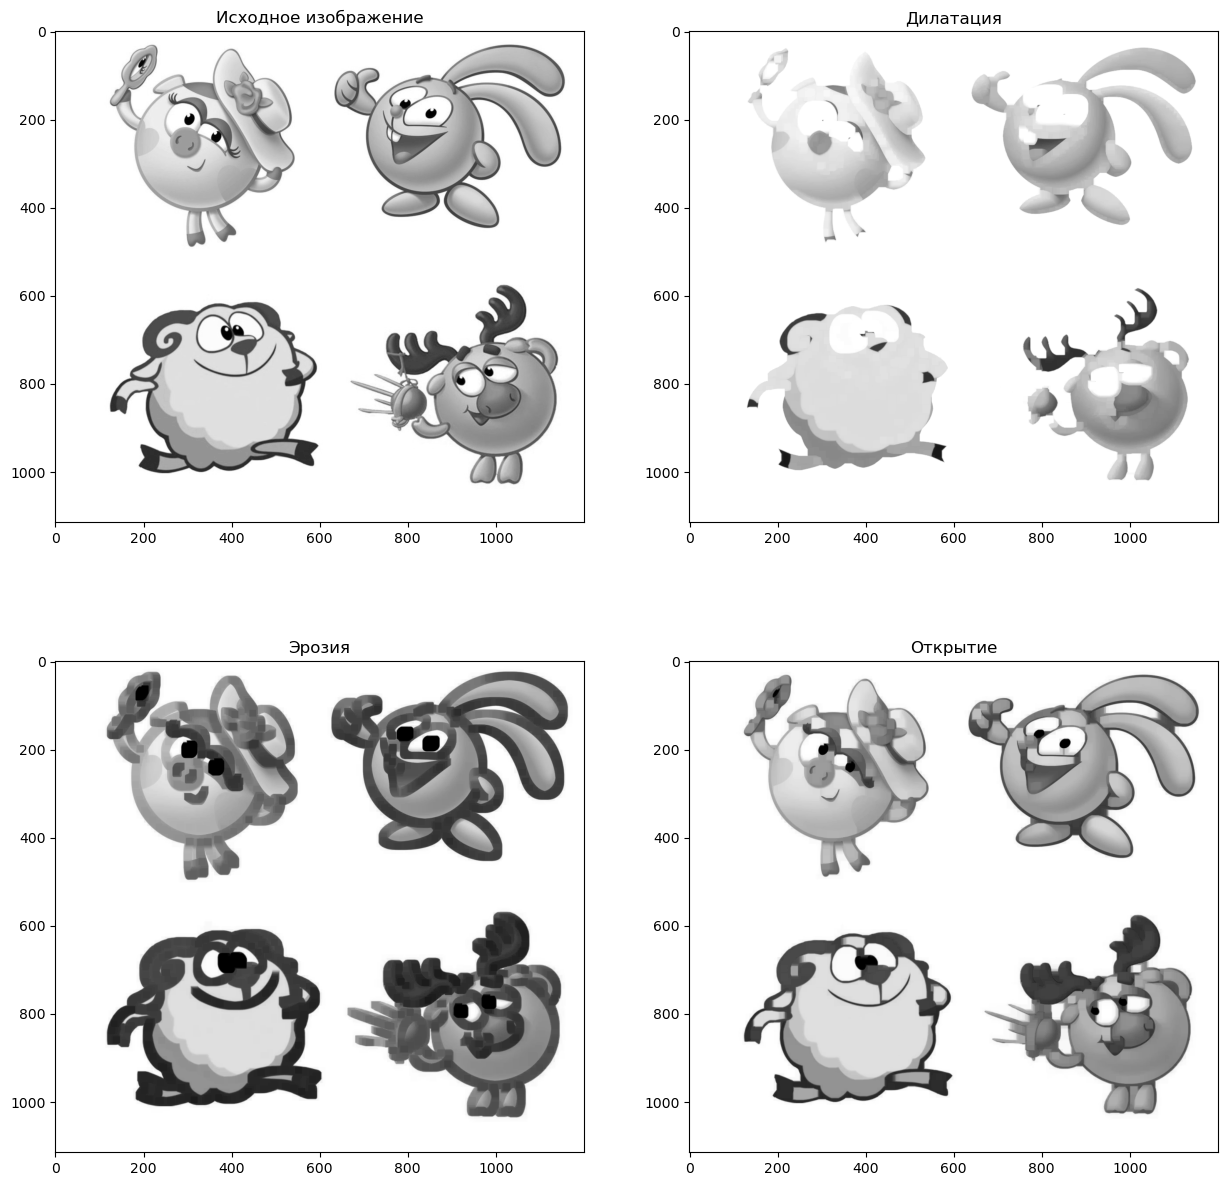

In [59]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(image, cmap="gray")
plt.title("Исходное изображение")

plt.subplot(222)
plt.imshow(dilated_image, cmap="gray")
plt.title("Дилатация")

plt.subplot(223)
plt.imshow(eroded_image, cmap="gray")
plt.title("Эрозия")

plt.subplot(224)
plt.imshow(opened_image, cmap="gray")
plt.title("Открытие")

plt.show()

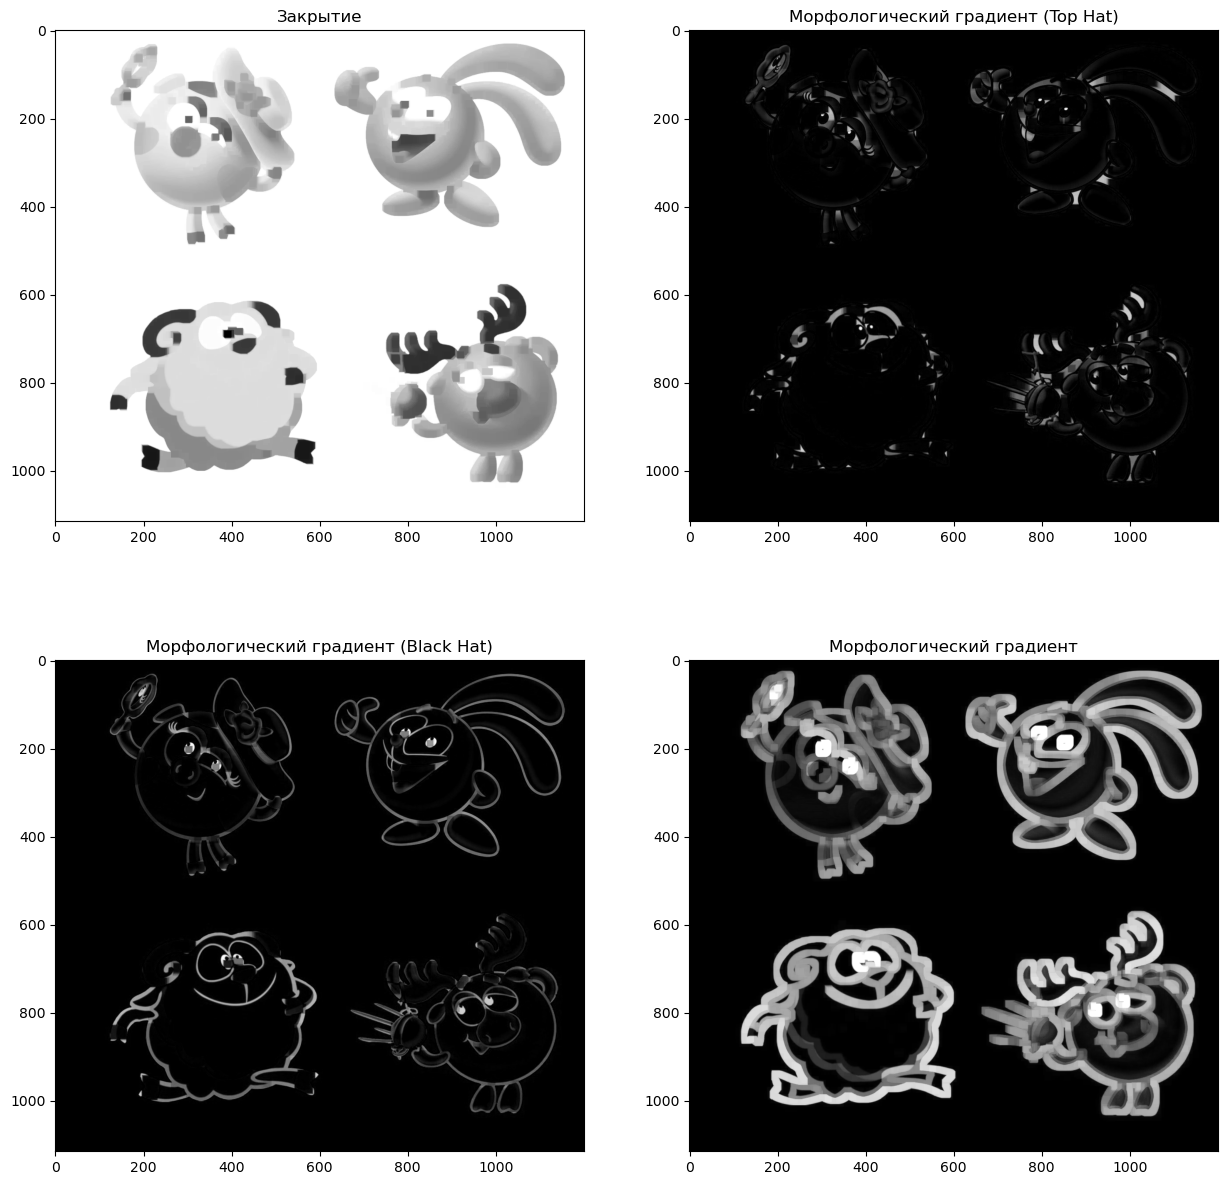

In [60]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(closed_image, cmap="gray")
plt.title("Закрытие")

plt.subplot(222)
plt.imshow(tophat_image, cmap="gray")
plt.title("Морфологический градиент (Top Hat)")

plt.subplot(223)
plt.imshow(blackhat_image, cmap="gray")
plt.title("Морфологический градиент (Black Hat)")

plt.subplot(224)
plt.imshow(gradient_image, cmap="gray")
plt.title("Морфологический градиент")

plt.show();

## Распознавание объекта по шаблону

In [13]:
img_rgb = cv2.imread('img/ris1.jpeg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('img/object.jpeg', 0)  # Шаблон для поиска

In [7]:
w, h = template.shape[::-1]

In [8]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

In [9]:
threshold = 0.8

In [10]:
loc = np.where(res >= threshold)

In [11]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

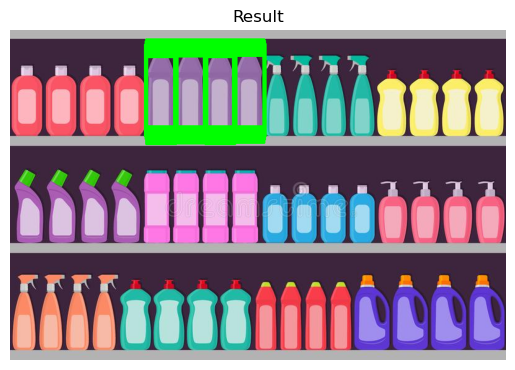

In [12]:
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title('Result')
plt.axis('off')
plt.show()

## Признаки объекта

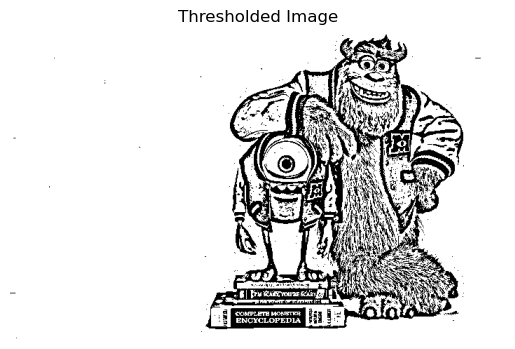

In [2]:
img_gray = cv2.cvtColor(cv2.imread('img/mult.jpeg'), cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

In [19]:
img = thresh
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
for contour in contours:
    # Вычисление площади объекта
    area = cv2.contourArea(contour)
    
    # Вычисление периметра объекта
    perimeter = cv2.arcLength(contour, True)

    # Вычисление ограничивающего прямоугольника объекта
    x, y, w, h = cv2.boundingRect(contour)

    # Вычисление отношения ширины к высоте ограничивающего прямоугольника
    aspect_ratio = float(w) / h

    # Вычисление отношения площади контура к площади ограничивающего прямоугольника
    extent = float(area) / (w * h)

    # Вычисление эквивалентного диаметра
    equivalent_diameter = np.sqrt(4 * area / np.pi)
    
    # Вычисление площади выпуклой оболочки
    hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(hull)

    # Вычисление моментов контура
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments).flatten()

In [23]:
print("Площадь:", area)
print("Периметр:", perimeter)
print("Ширина и высота ограничивающего прямоугольника:", w, h)
print("Отношение ширины к высоте ограничивающего прямоугольника:", aspect_ratio)
print("Отношение площади контура к площади ограничивающего прямоугольника:", extent)
print("Эквивалентный диаметр:", equivalent_diameter)
print("Площадь выпуклой оболочки:", hull_area)
print("Нормализованные моменты второго порядка:", hu_moments)

Площадь: 2292.5
Периметр: 2295.41421353817
Ширина и высота ограничивающего прямоугольника: 708 442
Отношение ширины к высоте ограничивающего прямоугольника: 1.6018099547511313
Отношение площади контура к площади ограничивающего прямоугольника: 0.007325779073037299
Эквивалентный диаметр: 54.02686050757864
Площадь выпуклой оболочки: 157039.5
Нормализованные моменты второго порядка: [ 3.17127291e+01  5.23029290e+02  2.04355004e+04  3.20093031e+03
  7.00883119e+05 -1.07459238e+03 -2.58790154e+07]


## Распознавание объектов с помощью нейронной сети

In [41]:
s = [1249.0, 577.0, 180.5, 7795.5, 163.0, 111.0, 909.5, 29.5]
p = [157.55, 141.34, 90.476, 1262.1, 61.799, 78.064, 175.47, 48.730]
w = [31, 51, 7, 66, 15, 5, 24, 5]
h = [54, 26, 41, 158, 22, 37, 70, 22]
kw = [0.574, 1.9615, 0.1707, 0.4177, 0.6818, 0.1351, 0.3429, 0.2272]
ks = [0.7461, 0.4351, 0.6289, 0.7475, 0.4939, 0.6, 0.5414, 0.2682]
d = [39.878, 27.105, 15.160, 99.627, 14.406, 11.888, 34.029, 6.1287]
m0 = [1249.0, 577.0, 180.5, 7795.5, 163.0, 111.0, 909.5, 29.5]
m1 = [15994, 18479, 3319.8, 255475, 790.83, 174.5, 8059.0, 40.833]
m2 = [27883, 4990.2, 1440.7, 616222, 1220.3, 2033.3, 21165, 160.5]
m3 = [307788, 175877, 180.5, 19613900, 4657.8, 3300.2, 153434, 152.375]

In [42]:
weights = [0.3, 0.5, 0.1, 0.2, 1, 1, 1, 1, 1, 1, 1]

In [43]:
def sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

In [44]:
def art_neuron(input, weights):
    pred = np.dot(input, weights)
    return pred

In [45]:
in0 = [s[0], p[0], w[0], h[0], kw[0], ks[0], d[0], m0[0], m1[0], m2[0], m3[0]]
in1 = [s[1], p[1], w[1], h[1], kw[1], ks[1], d[1], m0[1], m1[1], m2[1], m3[1]]
in2 = [s[2], p[2], w[2], h[2], kw[2], ks[2], d[2], m0[2], m1[2], m2[2], m3[2]]
in3 = [s[3], p[3], w[3], h[3], kw[3], ks[3], d[3], m0[3], m1[3], m2[3], m3[3]]
in4 = [s[4], p[4], w[4], h[4], kw[4], ks[4], d[4], m0[4], m1[4], m2[4], m3[4]]
in5 = [s[5], p[5], w[5], h[5], kw[5], ks[5], d[5], m0[5], m1[5], m2[5], m3[5]]

In [46]:
pred0 = art_neuron(in0, weights)
pred1 = art_neuron(in1, weights)
pred2 = art_neuron(in2, weights)
pred3 = art_neuron(in3, weights)
pred4 = art_neuron(in4, weights)
pred5 = art_neuron(in5, weights)

In [47]:
print(pred0)
print(pred1)
print(pred2)
print(pred3)
print(pred4)
print(pred5)

353422.5731
200206.7716
5245.747600000001
20496501.1922
6933.2112
5711.8551
